# Monotone cellular automata and bootstrap percolation

-Basic facts about bootstrap percolation

Let $U$ be a finite collection of finite sets $X\subseteq\mathbb{Z}^2-\{0\}$. For $A\subseteq \mathbb{Z}^2$ define 
$A_0=A$ and 
$A_{t+1}=A_t\cup \{ x\in \mathbb{Z}^2: x+X\subseteq A_t\}$. Finally define $[A]=\cup_{t\geq 0} A_t$.

Let $\mathbb{S}^1$ be the unit sphere in $\mathbb{R}^2$. Define $\mathscr{S}(U)=\{u\in \mathbb{S}^1 : [\mathbb{H}_u]=\mathbb{H}_u\}$, where $\mathbb{H}_u=\{x\in\mathbb{Z}^2: <x,u><0\}$.



We show that that there is a certian dichotomy: $[\mathbb{H}_u]=\mathbb{H_u}$ or $[\mathbb{H}_u]=\mathbb{Z}^2$. 
First, we observe that if $u$ is such that for some $X\in U$, $X\subseteq \mathbb{H_u}$, then $0\in[\mathbb{H}_u]$. This follows by definiton. Conversely, suppose that $[\mathbb{H}_u]\neq \mathbb{H}_u$. Then there exists $a\in\mathbb{Z}^2$ such that $<a,u>\geq 0$ and there exists $X\in U$ such that $a+X\subseteq \mathbb{H}_u$.
For $x\in X$, we have $<x,u>\leq <a+x,u><0$ (because $<a,u>\geq 0$ and $a+X\subseteq \mathbb{H}_u$. In particular, we have $X\subseteq\mathbb{H}_u$, so $0\in [\mathbb{H}_u]$. This shows that if $[\mathbb{H}_u]\neq \mathbb{H}_u$ then $0\in\mathbb{H}_u$, more precisely, $0$ has infection time 1. 


In [1]:
# importing useful libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import pyplot as plt, animation

%matplotlib notebook

In [2]:
# defining functions used for plotting and positioning of the graphs

def centering(n):
  s=[]
  for i in range(0,2*n+1):
    for j in range(0,2*n+1):
      s.append([(i,j),(i-n,j-n)])
  return(dict(s))

def positioning(n):
  s=[]
  for i in range(0,2*n+1):
    for j in range(0,2*n+1):
      s.append([(i-n,j-n),(i-n,j-n)])
  return(dict(s))

def labels(n):
  s=[]
  for i in range(0,2*n+1):
    for j in range(0,2*n+1):
      s.append([i-n,j-n])
  return(s)

def LABS(n):
    
  s=[]
  for i in range(0,2*n+1):
    for j in range(0,2*n+1):
      s.append([i-n,j-n])
  return(np.array(s).reshape(2*n+1,2*n+1,2))


def coloring(sequence):
  k=len(sequence)
  color_map=[]
  for i in range(k):
    for j in range(k):
      if sequence[i][j]==1:
        color_map.append('black')
      else:
        color_map.append('yellow')
  return(color_map)


def lattice_graph(n):
  G=nx.grid_graph(dim=(2*n+1,2*n+1))
  K=nx.relabel_nodes(G,centering(n))
  return(K)


In [167]:
# computes the updated state given a rule and a state

def update_state(rule,state):
    n= int((len(state)-1)/2)
    new_state=np.zeros(shape=(2*n+1,2*n+1))
    
    for i in range(2*n+1):
        for j in range(2*n+1):
            w=0
        
            
            for r in rule:
                if r[0]+i<2*n+1 and r[0]+i>=0 and r[1]+j>=0 and r[1]+j<2*n+1:
                    w=w+state[i+r[0],j+r[1]]
                    
            if w==len(rule) or state[i][j]==1:
                new_state[i][j]=1

        
            
    return(new_state)


In [168]:
# computes the updated state given several rules and a state

def update(rules,state):
    
    n= int((len(state)-1)/2)
    new_state=np.zeros(shape=(2*n+1,2*n+1))
    
    
    for rule in rules:
        new_state=new_state+update_state(rule,state)
    
    
    for i in range(2*n+1):
        for j in range(2*n+1):
            if new_state[i][j]>0:
                new_state[i][j]=1
                
    
    return(new_state)


In [169]:
# evolution of the U-BP process with parameters U=rules, iterations= number of iterations, A=initial_set

def evolution(rules,iterations,initial_set):
    output=[initial_set]
    b=initial_set
    
    for j in range(iterations):
        b=update(rules,b)
        output.append(b)
    
    return(output)

In [109]:
# For Oriented site percolation

U=[[[-1,1],[1,1]]]
rule=[[-1,1],[1,1]]
rules=U

A=np.random.binomial(n=1,p=0.5,size=(61,61))




In [160]:
# For spiral model

U=[[[1,-1],[1,0],[1,1],[0,1]],[[-1,1],[-1,0],[-1,-1],[0,-1]],[[1,-1],[1,0],[-1,-1],[0,-1]],[[-1,1],[-1,0],[1,1],[0,1]]]

rules=U

A=np.random.binomial(n=1,p=0.5,size=(61,61))

In [171]:
# For two neighbours model

U=[[[0,1],[1,0]], [[0,1],[0,-1]],[[0,1],[-1,0]],[[1,0],[-1,0]],[[1,0],[0,-1]],[[-1,0],[0,-1]]]

rules=U


A=np.random.binomial(n=1,p=0.1,size=(61,61))

In [172]:
evolution=evolution(rules,iterations=50,initial_set=A)

In [173]:
G=lattice_graph(30)

In [63]:
nx.draw(G,pos=positioning(30),node_size=10,node_color=coloring(evolution[5]))

Here we illustrate how the infection spreads in the unstable (rational) direction $v=(1,0)$ with $U=\{(-1,-1)\}$.

<IPython.core.display.Javascript object>


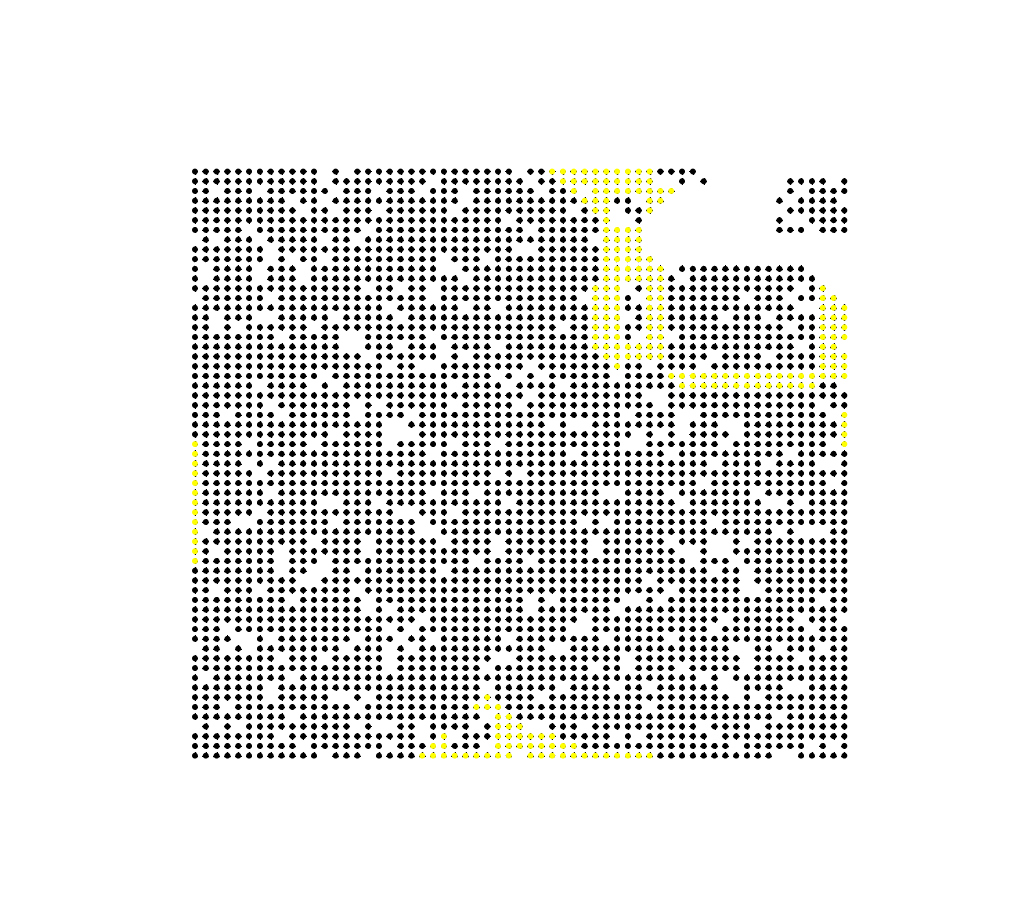

In [174]:
fig = plt.figure()



def animate(frame):
   fig.clear()
   v=evolution[frame]
   plt.title('2-neighbour model, p=0.1 ')
   nx.draw(G,pos=positioning(30),node_size=10,node_color=coloring(v))





ani = animation.FuncAnimation(fig, animate, frames=50, interval=1000, repeat=True)
plt.show()

In [175]:
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=5)
ani.save('2Neighbour.p.01.mp4', writer=writervideo)

In [299]:
U=[[[-1,-1]]]

rules=U

w=np.array([1,np.sqrt(2)])

H_w=np.zeros(shape=(61,61))

for i in range(0,61):
    for j in range(0,61):
        if np.dot(LABS(30)[i][j],w)<0:
            H_w[i][j]=1

In [300]:
evolution1=evolution(rules,iterations=100,initial_set=H_w)

Here we illustrate how the infections spreads for the irational unstable direction $v=(1,\sqrt(2))$ , with $U=\{(-1,-1)\}$ 
(Rerun the code for the evolution functon so you don't get an error).

<IPython.core.display.Javascript object>


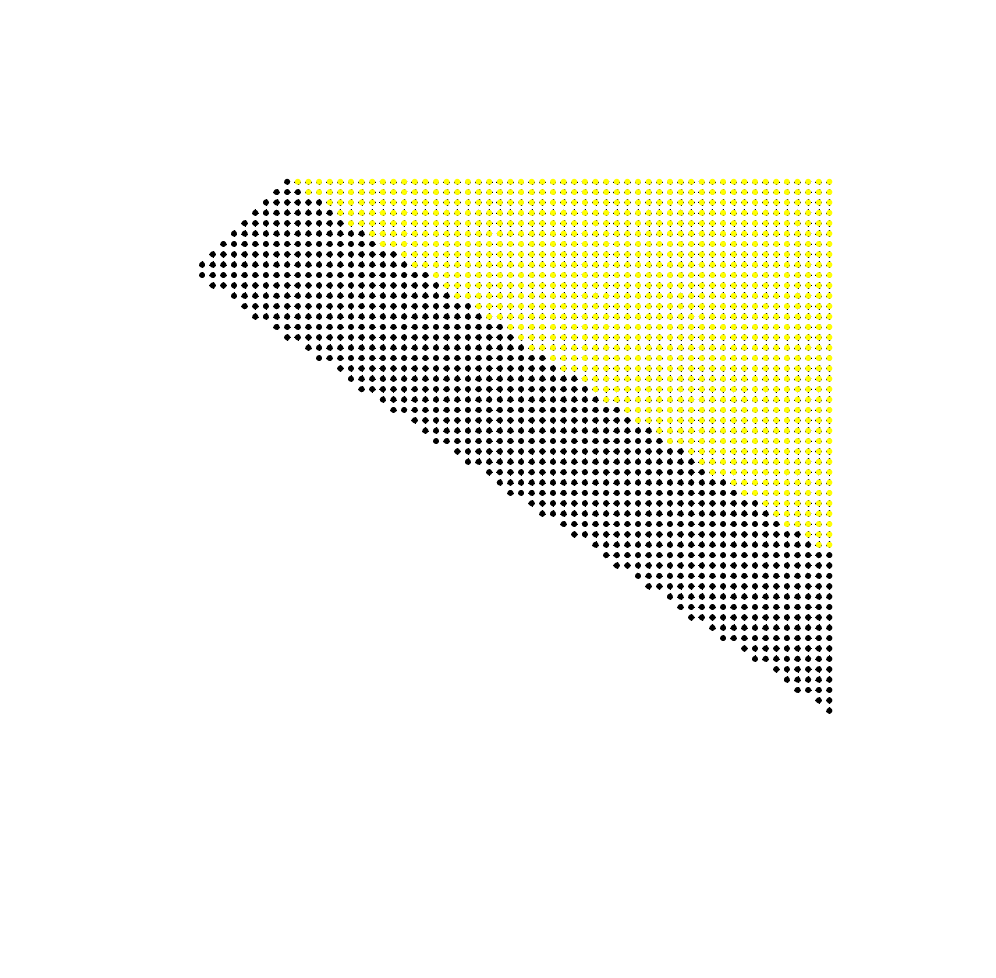

In [304]:
fig = plt.figure()



def animate(frame):
   fig.clear()
   v=evolution1[frame]
   plt.title('U={(-1,-1)}, v=(1,sqrt(2)) is unstable and irational direction ')
   nx.draw(G,pos=positioning(50),node_size=10,node_color=coloring(v))





anim = animation.FuncAnimation(fig, animate, frames=50, interval=1000, repeat=True)
plt.show()

In [305]:
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=1)
anim.save('Unstable_IRational_direction.mp4', writer=writervideo)

The set $\mathscr{S}(U)$ is called a set of stable directions for $U$. Based on the properties of this set we distinguish between three models.

# Supercritical models